<a href="https://colab.research.google.com/github/kalpeshgithub10/Projects/blob/master/WINE_QUALITY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Read the dataset
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
df.shape

(1599, 12)

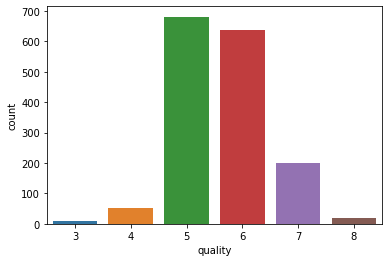

In [5]:
#plot the necessary plots
sns.countplot(x = 'quality', data = df)

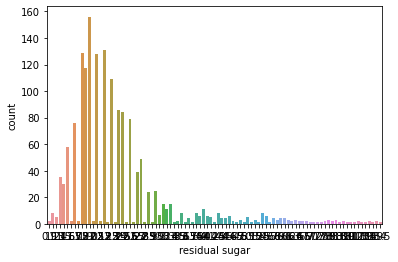

In [6]:
sns.countplot(x = 'residual sugar', data = df)

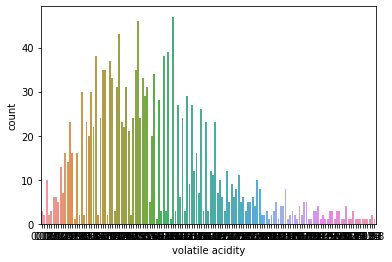

In [7]:
sns.countplot(x = 'volatile acidity', data = df)

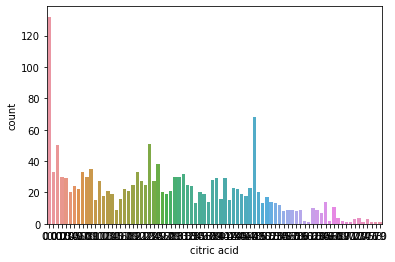

In [8]:
sns.countplot(x = 'citric acid', data = df)

In [9]:
#fixed acidity, residual sugar, chlorides, total sulfur dioxide, alcohol are the important features

In [11]:
#Select the feature variables
X = df[['fixed acidity','residual sugar','chlorides', 'total sulfur dioxide', 'alcohol']].values
X[0:5]

array([[ 7.4  ,  1.9  ,  0.076, 34.   ,  9.4  ],
       [ 7.8  ,  2.6  ,  0.098, 67.   ,  9.8  ],
       [ 7.8  ,  2.3  ,  0.092, 54.   ,  9.8  ],
       [11.2  ,  1.9  ,  0.075, 60.   ,  9.8  ],
       [ 7.4  ,  1.9  ,  0.076, 34.   ,  9.4  ]])

In [12]:
#Normalize the Features
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X[0:5]

array([[-0.52835961, -0.45321841, -0.24370669, -0.37913269, -0.96024611],
       [-0.29854743,  0.04341614,  0.2238752 ,  0.62436323, -0.58477711],
       [-0.29854743, -0.16942723,  0.09635286,  0.22904665, -0.58477711],
       [ 1.65485608, -0.45321841, -0.26496041,  0.41150046, -0.58477711],
       [-0.52835961, -0.45321841, -0.24370669, -0.37913269, -0.96024611]])

In [13]:
#Select the target variable
y = df['quality']
y[0:5]

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [14]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 , random_state = 4 )
print("Train size : ", X_train.shape, y_train.shape)
print("Test size : ", X_test.shape, y_test.shape)

Train size :  (1279, 5) (1279,)
Test size :  (320, 5) (320,)


In [15]:
#Build the model and train it
from sklearn.tree import DecisionTreeClassifier
des = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 4)
des.fit(X_train,y_train)
des

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
#PREDICTION
y_hat = des.predict(X_test)
print(y_hat[0:5])
print(y_test[0:5])

[5 5 6 6 5]
289    5
962    5
826    7
495    8
57     5
Name: quality, dtype: int64


In [17]:
#EVALUATION CRITERIA
from sklearn import metrics
print("Accuracy score : %.2f" % metrics.accuracy_score(y_test,y_hat))

from sklearn.metrics import f1_score
print("F1 Score : %.2f" % f1_score(y_test,y_hat,average = 'weighted'))

Accuracy score : 0.54
F1 Score : 0.52


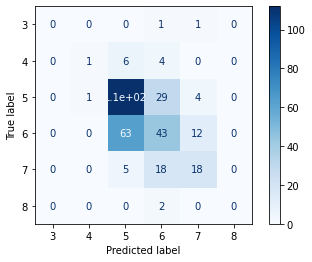

In [22]:
from sklearn.metrics import plot_confusion_matrix

pcm = plot_confusion_matrix(des, X_test, y_test, display_labels = ['3','4','5','6','7','8'], cmap = plt.cm.Blues)
print(pcm)

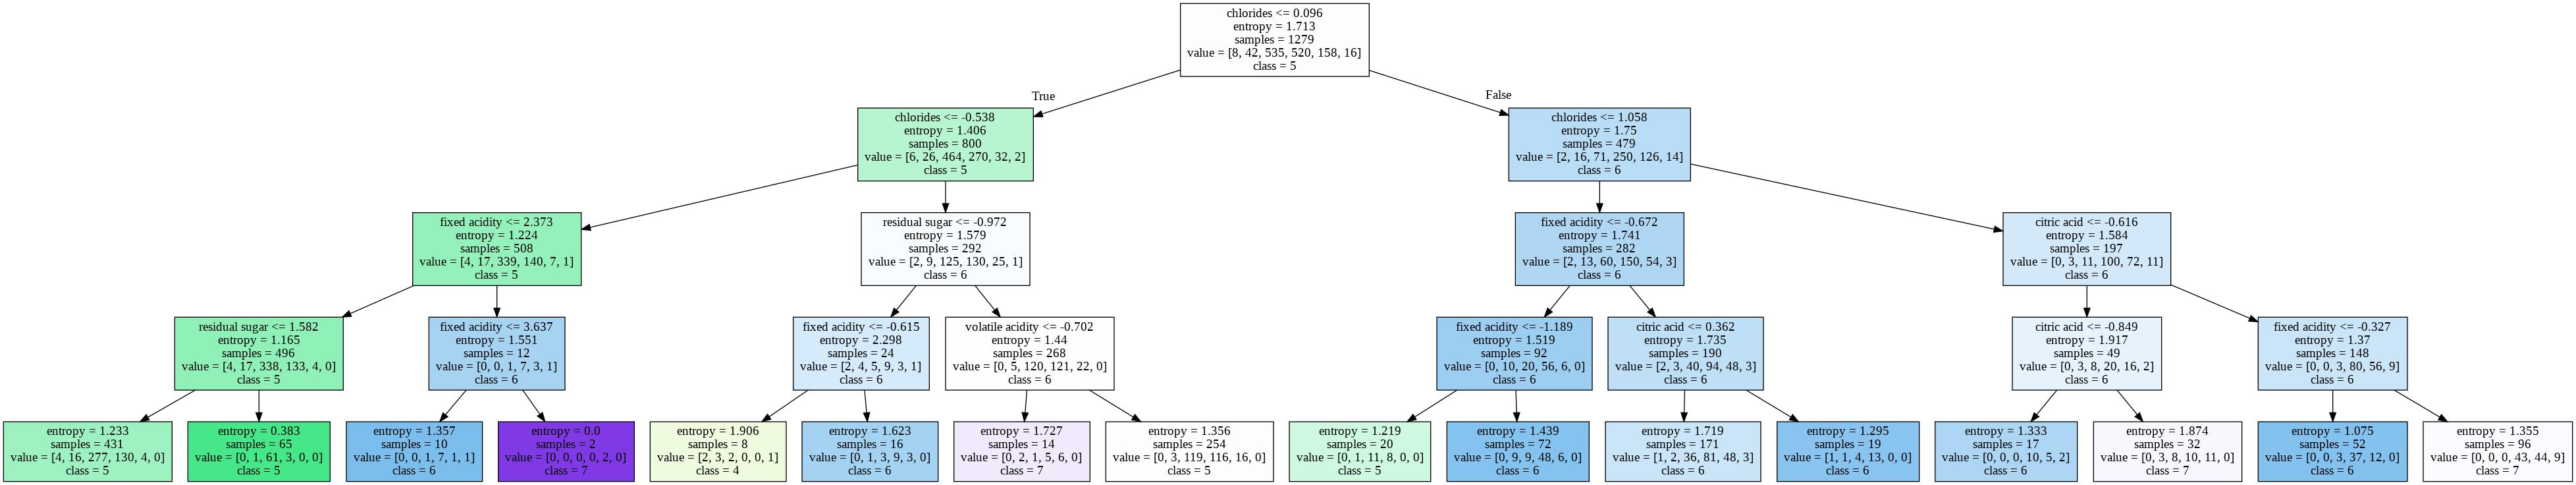

In [25]:
#PLOT THE DECISION TREE
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image

fn = df.columns[0:5]
cn = ['3','4','5','6','7','8']

#EXPORT THE TREE INTO ODT FILE
tree.export_graphviz(des, feature_names = fn, class_names = cn, out_file = 'tree.odt', filled = True)

#READ THE CREATED FILE AND CONVERT IT INTO AN IMAGE FILE
graph = pdot.graphviz.graph_from_dot_file('tree.odt')
graph.write_jpg("Tree.png")

#RENDER THE PNG FILE
Image(filename = 'Tree.png')